In [1]:
import numpy as np
import matplotlib.pyplot as plt
from shapely import voronoi_polygons, MultiPoint, Polygon, Point
import matplotlib.colors as mcolors
from matplotlib import colormaps
np.random.seed(42)

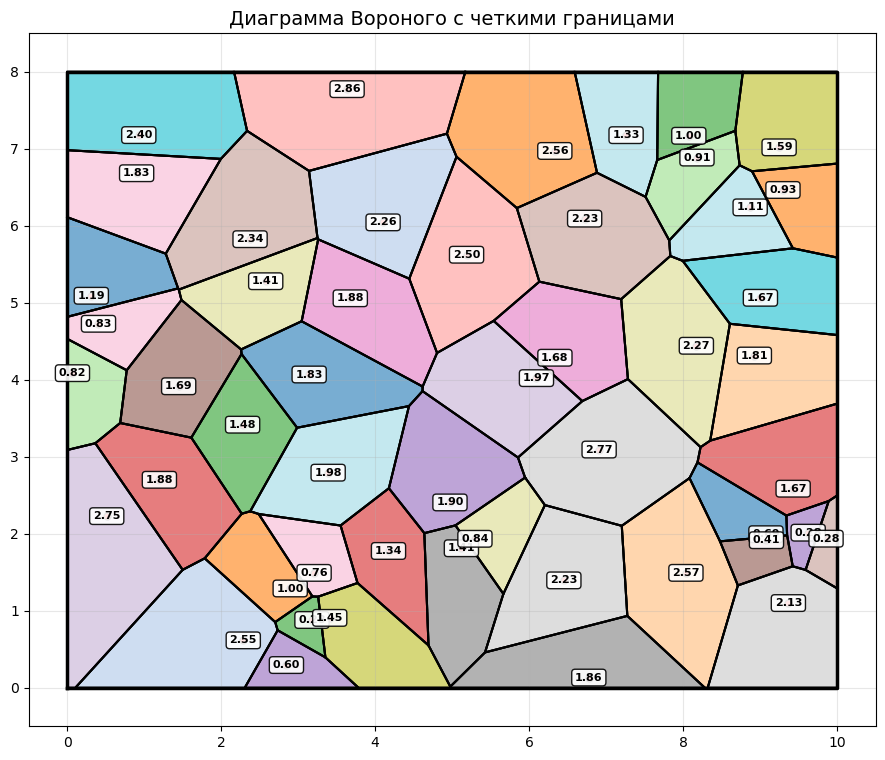

Площади регионов:
Точка 0: 1.1851; Координаты [0.31, 5.09]
Точка 1: 1.8284; Координаты [3.14, 4.07]
Точка 2: 0.6861; Координаты [9.08, 1.99]
Точка 3: 2.2579; Координаты [4.10, 6.04]
Точка 4: 2.5539; Координаты [2.29, 0.62]
Точка 5: 0.9966; Координаты [2.90, 1.29]
Точка 6: 0.9295; Координаты [9.30, 6.46]
Точка 7: 2.5627; Координаты [6.33, 6.97]
Точка 8: 2.5743; Координаты [8.04, 1.49]
Точка 9: 1.8095; Координаты [8.93, 4.31]
Точка 10: 1.0014; Координаты [8.07, 7.17]
Точка 11: 0.2764; Координаты [3.18, 0.88]
Точка 12: 1.4752; Координаты [2.28, 3.42]
Точка 13: 0.9081; Координаты [8.18, 6.89]
Точка 14: 0.8150; Координаты [0.07, 4.09]
Точка 15: 1.3397; Координаты [4.17, 1.78]
Точка 16: 1.8833; Координаты [1.20, 2.70]
Точка 17: 1.6728; Координаты [9.43, 2.59]
Точка 18: 2.4978; Координаты [5.19, 5.62]
Точка 19: 2.8599; Координаты [3.64, 7.77]
Точка 20: 0.2783; Координаты [9.62, 2.01]
Точка 21: 1.9039; Координаты [4.97, 2.41]
Точка 22: 0.5981; Координаты [2.85, 0.30]
Точка 23: 1.9693; Координа

In [7]:
# Задаем параметры
a, b = 10, 8
n = 50
points = np.random.rand(n, 2) * [a, b]
# Создаем MultiPoint из всех точек
multi_point = MultiPoint(points)

# Создаем ограничивающий полигон
bounds = Polygon([(0, 0), (a, 0), (a, b), (0, b)])

# Строим диаграмму Вороного
voronoi_polys = voronoi_polygons(multi_point)

# Вычисляем площади для каждого региона
areas = []
clipped_polygons = []

# Преобразуем результат в список полигонов
if hasattr(voronoi_polys, 'geoms'):
    voronoi_geoms = list(voronoi_polys.geoms)
else:
    voronoi_geoms = [voronoi_polys]

# Для каждой точки находим соответствующий полигон
for i, point in enumerate(points):
    point_geom = Point(point)
    found_polygon = None
    
    # Ищем полигон, который содержит точку
    for poly in voronoi_geoms:
        if poly.contains(point_geom):
            found_polygon = poly
            break

    # Если не нашли содержащий полигон, ищем ближайший
    if found_polygon is None:
        min_distance = float('inf')
        for poly in voronoi_geoms:
            distance = poly.distance(point_geom)
            if distance < min_distance:
                min_distance = distance
                found_polygon = poly
    
    # Обрезаем полигон по границам
    if found_polygon is not None:
        clipped_poly = found_polygon.intersection(bounds)
        areas.append(clipped_poly.area)
        clipped_polygons.append(clipped_poly)
    else:
        areas.append(0)
        clipped_polygons.append(None)

# Визуализируем результат с улучшенными цветами и границами
fig, ax = plt.subplots(figsize=(12, 9))

# Создаем цветовую карту с достаточным количеством различных цветов
colors = list(mcolors.TABLEAU_COLORS.values()) + list(mcolors.CSS4_COLORS.values())
# Или используем цветовую карту
cmap = plt.colormaps['tab20'].resampled(len(points))

# Рисуем обрезанные полигоны с разными цветами и черными границами
for i, poly in enumerate(clipped_polygons):
    if poly is not None and not poly.is_empty:
        color = cmap(i % len(points))
        
        if hasattr(poly, 'exterior'):
            x, y = poly.exterior.xy
            ax.fill(x, y, alpha=0.6, color=color, edgecolor='black', linewidth=1.5)
            # Также рисуем границу отдельно для лучшей видимости
            ax.plot(x, y, color='black', linewidth=1.5)
        elif hasattr(poly, 'geoms'):  # MultiPolygon
            for geom in poly.geoms:
                x, y = geom.exterior.xy
                ax.fill(x, y, alpha=0.6, color=color, edgecolor='black', linewidth=1.5)
                ax.plot(x, y, color='black', linewidth=1.5)
        
        # Подписываем площадь
        ax.annotate(f'{areas[i]:.2f}', 
                   (points[i][0], points[i][1]), 
                   ha='center', va='center',
                   fontweight='bold', fontsize=8,
                   bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.9))

# Рисуем исходные точки
ax.plot(points[:, 0], points[:, 1], 'ro', markersize=5, markeredgecolor='black')

# Рисуем границы области
bound_x, bound_y = bounds.exterior.xy
ax.plot(bound_x, bound_y, 'k-', linewidth=2.5)

ax.set_xlim(-0.5, a + 0.5)
ax.set_ylim(-0.5, b + 0.5)
ax.set_aspect('equal')
ax.grid(True, alpha=0.3)
plt.title('Диаграмма Вороного с четкими границами', fontsize=14)
plt.show()

# Выводим результаты
print("Площади регионов:")
for i, (point, area) in enumerate(zip(points, areas)):
    print(f"Точка {i}: {area:.4f}; Координаты [{point[0]:.2f}, {point[1]:.2f}]")

print(f"\nСумма всех площадей: {sum(areas):.4f}")
print(f"Площадь всей плоскости: {a*b}")
print(f"Разница: {abs(sum(areas) - a*b):.6f}")

In [11]:
def make_voronoi(a,b, points):
    # Создаем MultiPoint из всех точек
    multi_point = MultiPoint(points)
    
    # Создаем ограничивающий полигон
    bounds = Polygon([(0, 0), (a, 0), (a, b), (0, b)])
    
    # Строим диаграмму Вороного
    voronoi_polys = voronoi_polygons(multi_point)
    
    # Вычисляем площади для каждого региона
    areas = []
    clipped_polygons = []
    
    # Преобразуем результат в список полигонов
    if hasattr(voronoi_polys, 'geoms'):
        voronoi_geoms = list(voronoi_polys.geoms)
    else:
        voronoi_geoms = [voronoi_polys]
    
    # Для каждой точки находим соответствующий полигон
    for i, point in enumerate(points):
        point_geom = Point(point)
        found_polygon = None
        
        # Ищем полигон, который содержит точку
        for poly in voronoi_geoms:
            if poly.contains(point_geom):
                found_polygon = poly
                break
    
        # Если не нашли содержащий полигон, ищем ближайший
        if found_polygon is None:
            min_distance = float('inf')
            for poly in voronoi_geoms:
                distance = poly.distance(point_geom)
                if distance < min_distance:
                    min_distance = distance
                    found_polygon = poly
        
        # Обрезаем полигон по границам
        if found_polygon is not None:
            clipped_poly = found_polygon.intersection(bounds)
            areas.append(clipped_poly.area)
            clipped_polygons.append(clipped_poly)
        else:
            areas.append(0)
            clipped_polygons.append(None)
    return clipped_polygons, areas

In [96]:
def draw(a,b, points, clipped_polygons, areas, figsize = (12,9), show_area_index = -2, supress = True, header = "Диаграмма Вороного"):
    bounds = Polygon([(0, 0), (a, 0), (a, b), (0, b)])
    # Визуализируем результат с улучшенными цветами и границами
    fig, ax = plt.subplots(figsize=figsize)
    
    # Создаем цветовую карту с достаточным количеством различных цветов
    colors = list(mcolors.TABLEAU_COLORS.values()) + list(mcolors.CSS4_COLORS.values())
    # Или используем цветовую карту
    cmap = plt.colormaps['tab20'].resampled(len(points))

    # Рисуем обрезанные полигоны с разными цветами и черными границами
    for i, poly in enumerate(clipped_polygons):
        if poly is not None and not poly.is_empty:
            color = cmap(i % len(points))
            
            if hasattr(poly, 'exterior'):
                x, y = poly.exterior.xy
                ax.fill(x, y, alpha=0.6, color=color, edgecolor='black', linewidth=1.5)
                # Также рисуем границу отдельно для лучшей видимости
                ax.plot(x, y, color='black', linewidth=1.5)
            elif hasattr(poly, 'geoms'):  # MultiPolygon
                for geom in poly.geoms:
                    x, y = geom.exterior.xy
                    ax.fill(x, y, alpha=0.6, color=color, edgecolor='black', linewidth=1.5)
                    ax.plot(x, y, color='black', linewidth=1.5)
            
            # Подписываем площадь
            if ((show_area_index == -1) or show_area_index == i):
                ax.annotate(f'{areas[i]:.2f}', 
                           (points[i][0], points[i][1]), 
                           ha='center', va='center',
                           fontweight='bold', fontsize=8,
                           bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.9))
    
    # Рисуем исходные точки
    ax.plot(points[:, 0], points[:, 1], 'ro', markersize=5, markeredgecolor='black')
    
    # Рисуем границы области
    bound_x, bound_y = bounds.exterior.xy
    ax.plot(bound_x, bound_y, 'k-', linewidth=2.5)
    
    ax.set_xlim(0, a)
    ax.set_ylim(0, b)
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3)
    plt.title(header, fontsize=14)
    plt.show()
    if (supress):
        return
    # Выводим результаты
    print("Площади регионов:")
    for i, (point, area) in enumerate(zip(points, areas)):
        print(f"Точка {i}: {area:.4f}; Координаты [{point[0]:.2f}, {point[1]:.2f}]")
    
    print(f"\nСумма всех площадей: {sum(areas):.4f}")
    print(f"Площадь всей плоскости: {a*b}")
    print(f"Разница: {abs(sum(areas) - a*b):.6f}")

In [99]:
def Adam(a,b, points, index, supress = False):
    starting = points.copy()
    eps = 10e-4
    eta = 10e-3
    beta1, beta2 = 0.9, 0.999  # для Adam
    m = np.zeros(2)  # первый момент
    v = np.zeros(2)  # второй момент
    epsilon = 1e-8
    tolerance = 1e-4
    max_iter = 200
    start_area = None
    end_area = None
    for i in range(max_iter):
        segments, areas = make_voronoi(a,b, points)
        area = areas[index]
        if(i == 0):
            start_area = area
        end_area = area
        
        points_eps_x = points.copy()
        points_eps_x[index] +=[eps, 0]
        _, new_areas = make_voronoi(a,b, points_eps_x)
        grad_x = (new_areas[index] - area)/eps
        
        points_eps_y = points.copy()
        points_eps_y[index] +=[0, eps]
        
        _, new_areas = make_voronoi(a,b, points_eps_y)
        grad_y = (new_areas[index] - area)/eps
    
        grad = np.array([grad_x, grad_y])
        # Adam
        m = beta1 * m + (1 - beta1) * grad
        v = beta2 * v + (1 - beta2) * grad**2
        m_hat = m / (1 - beta1**(i+1))
        v_hat = v / (1 - beta2**(i+1))
        
        points[index] += eta * m_hat / (np.sqrt(v_hat) + epsilon)
        
        if(points[index][0] > 1 or points[index][0] < 0 or points[index][1] > 1 or points[index][1] < 0):
            print("end")
            break
        if(sum(grad**2) < tolerance):
            break
        if(not supress):
            print(f"Iteration {i}; Area {round(area,5)}; Grad {grad_x**2 + grad_y**2}")
    if (start_area > end_area):
        points = starting
        end_area = start_area
    return points, start_area, end_area

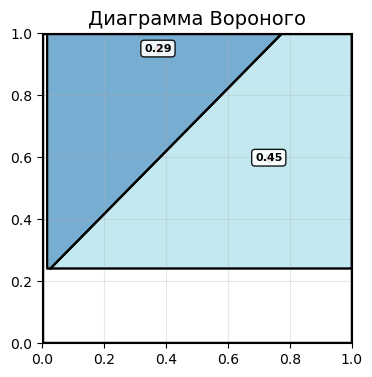

In [102]:
np.random.seed(42)

a, b = 1, 1
n = 2
points = np.random.rand(n, 2) * [a, b]
segments, areas = make_voronoi(a,b,points)
draw(a,b, points, segments, areas, figsize = (4,6), show_area_index = -1)

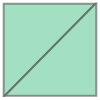

In [104]:
multi_point = MultiPoint(points)
    
# Создаем ограничивающий полигон
bounds = Polygon([(0, 0), (a, 0), (a, b), (0, b)])

# Строим диаграмму Вороного
voronoi_polys = voronoi_polygons(multi_point)
voronoi_polys

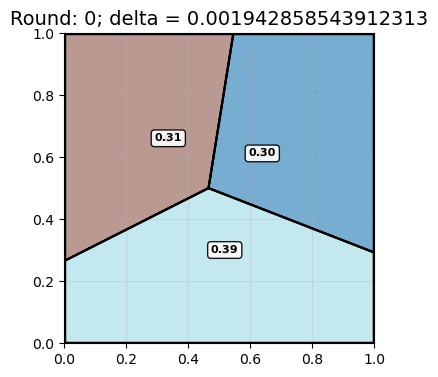

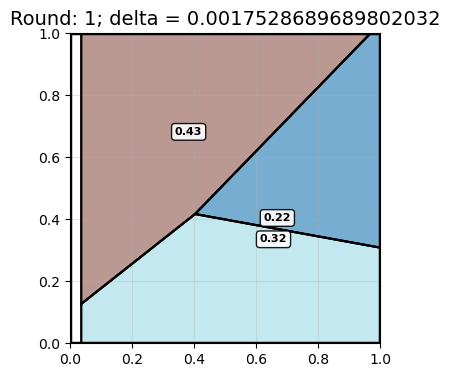

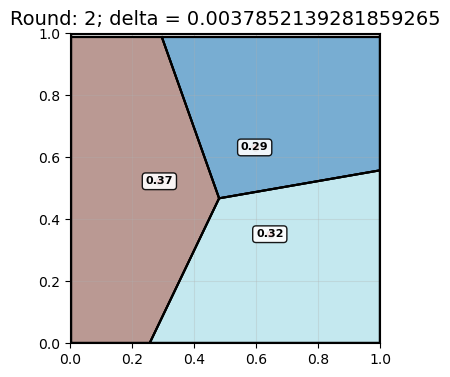

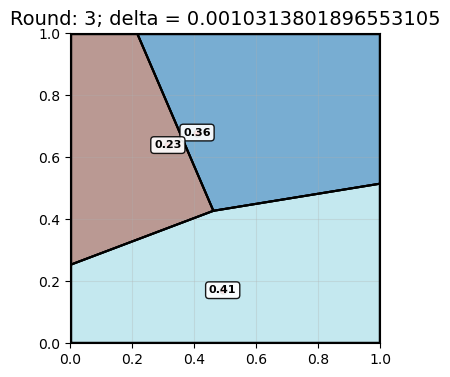

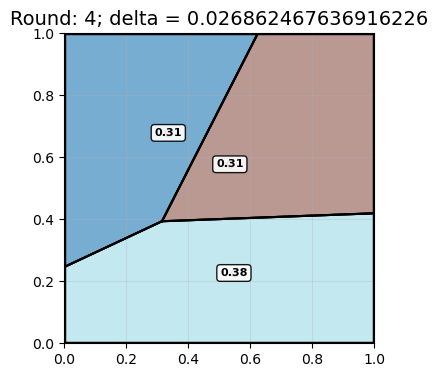

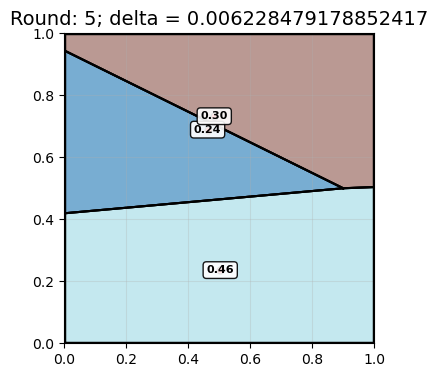

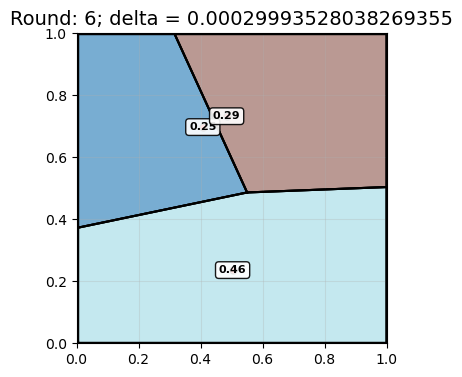

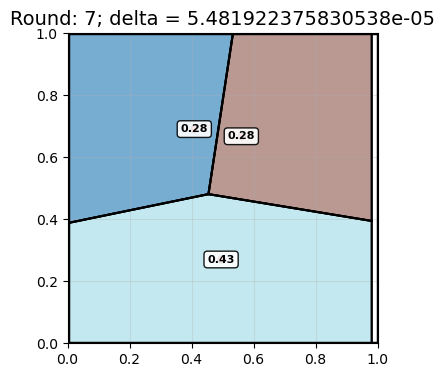

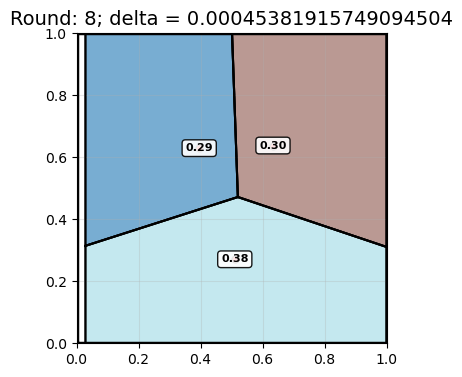

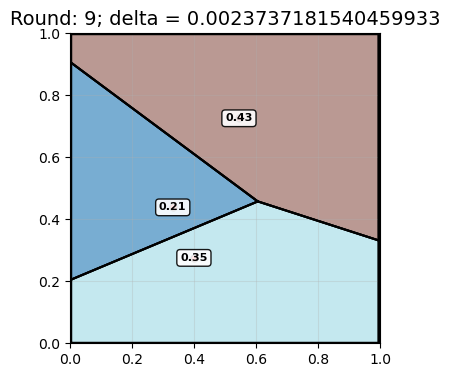

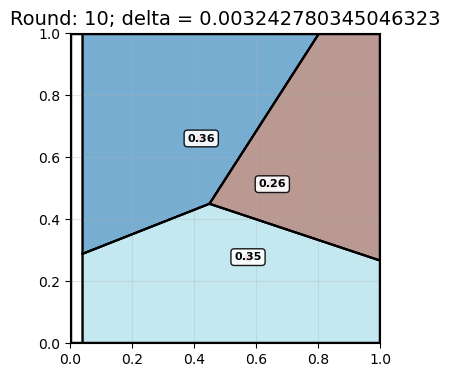

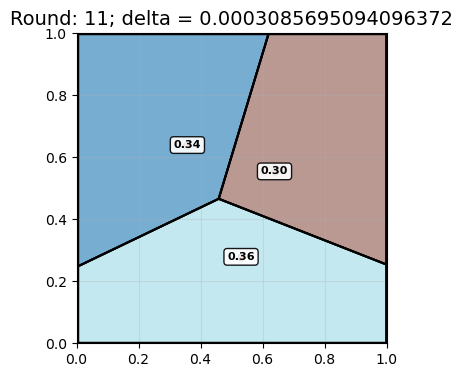

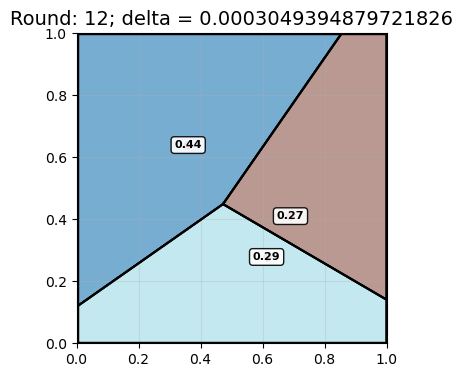

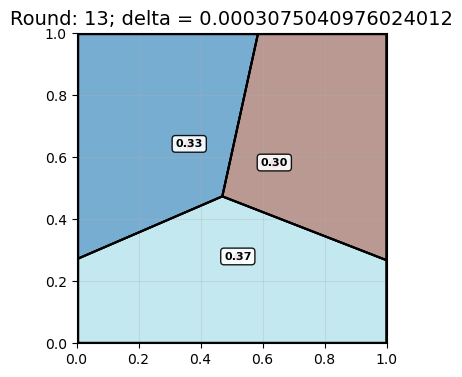

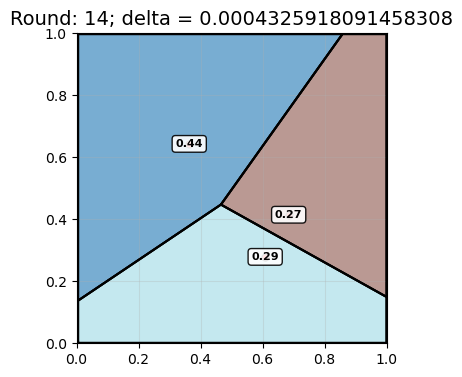

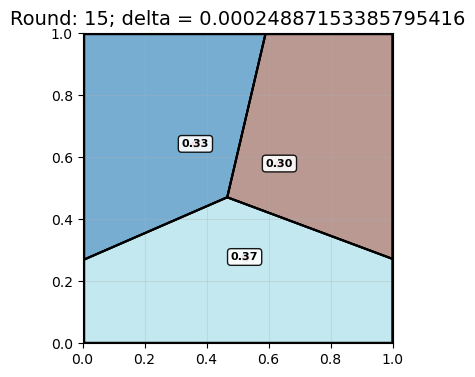

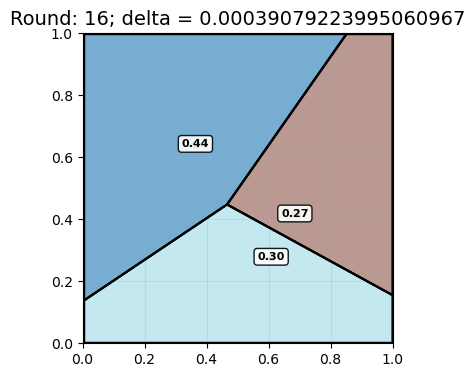

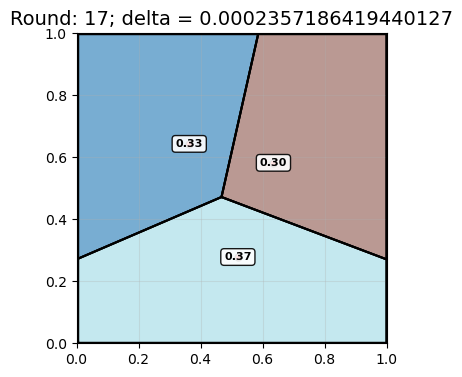

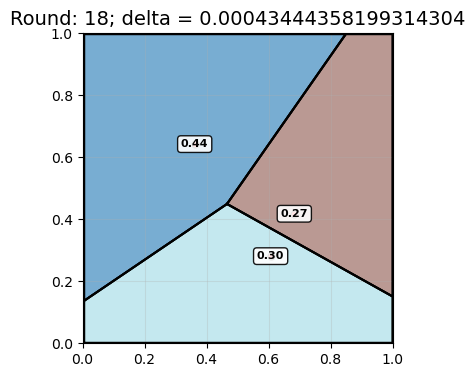

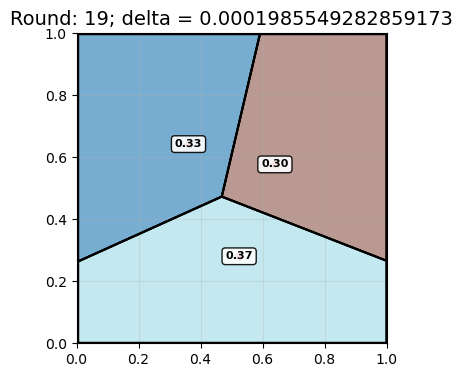

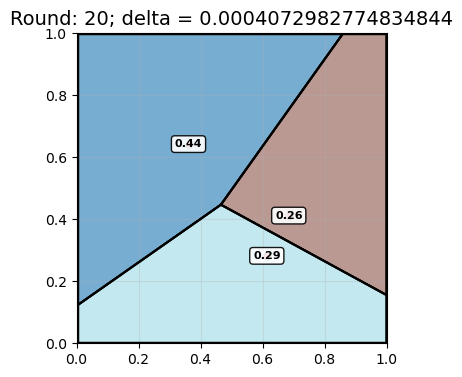

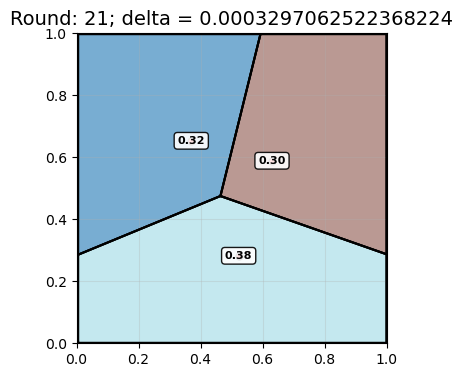

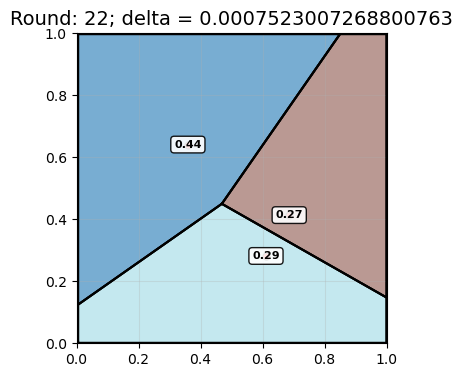

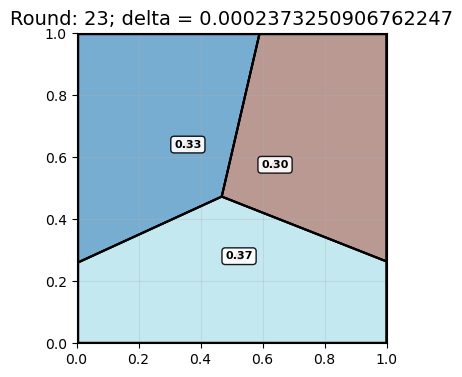

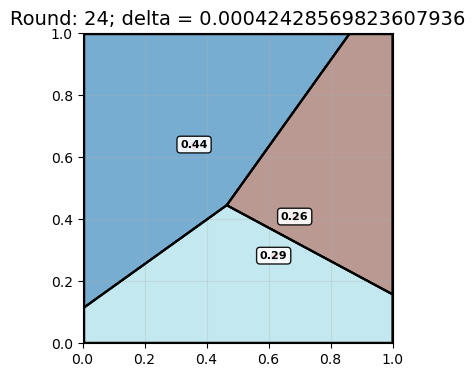

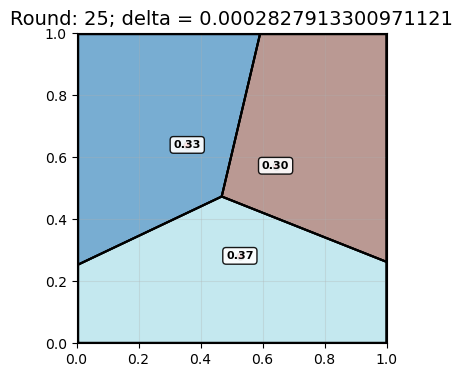

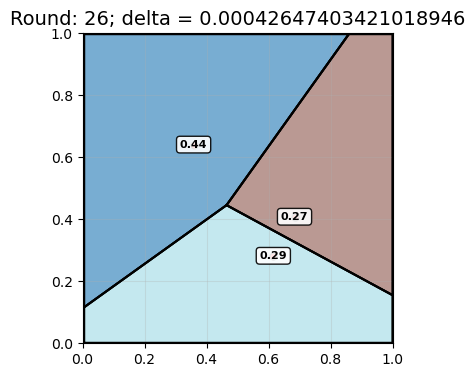

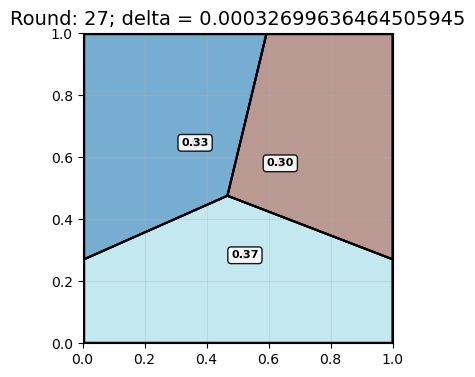

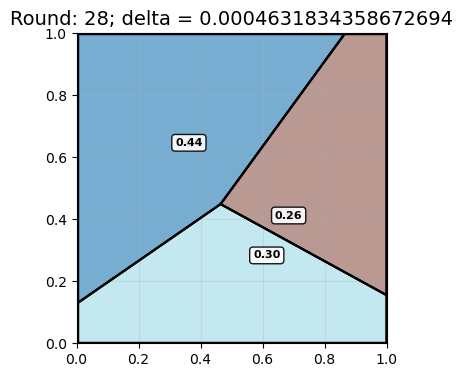

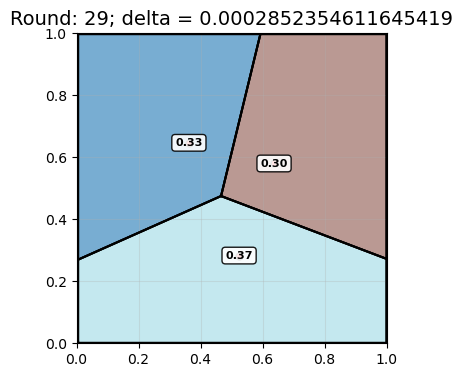

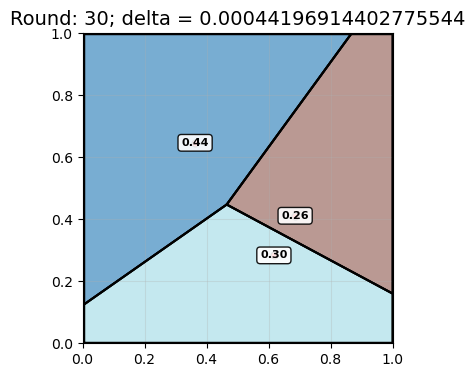

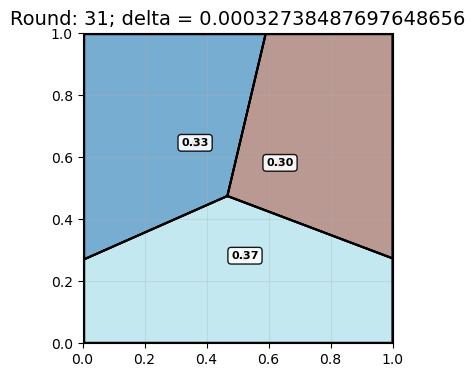

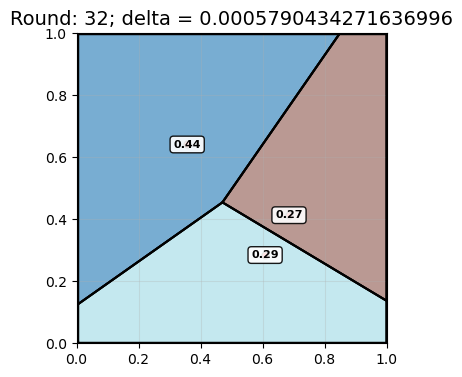

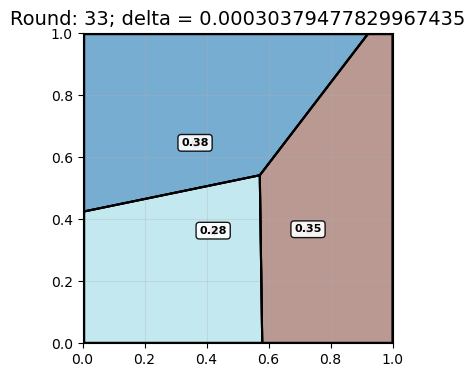

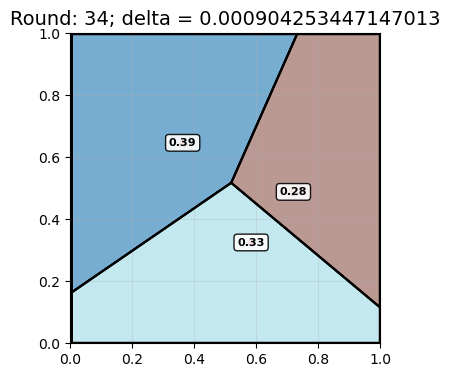

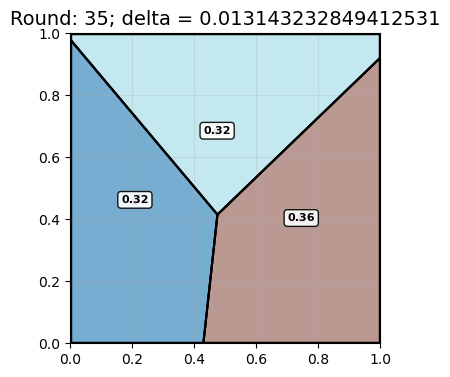

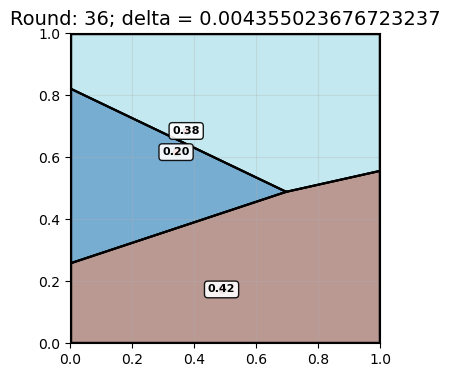

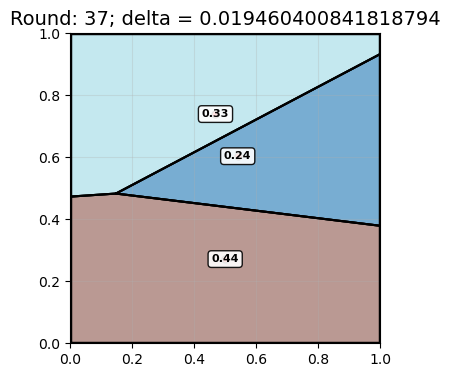

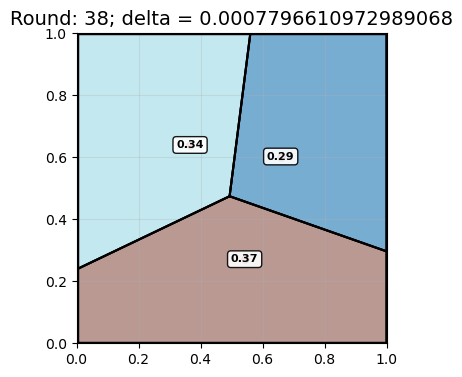

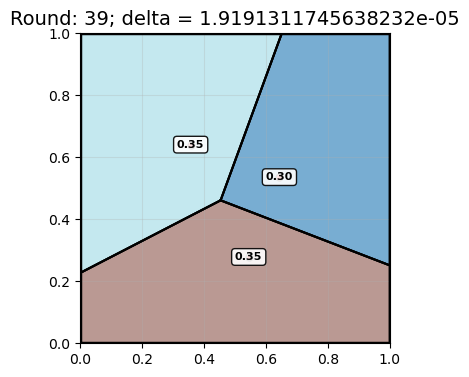

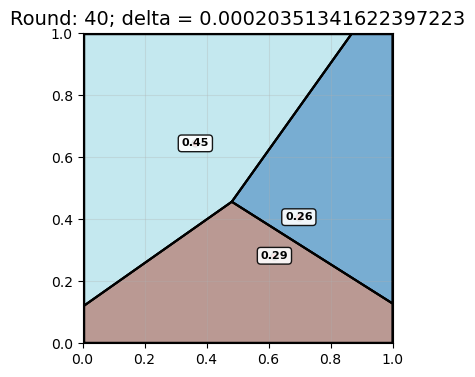

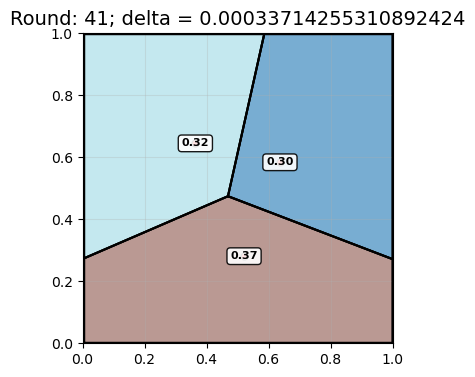

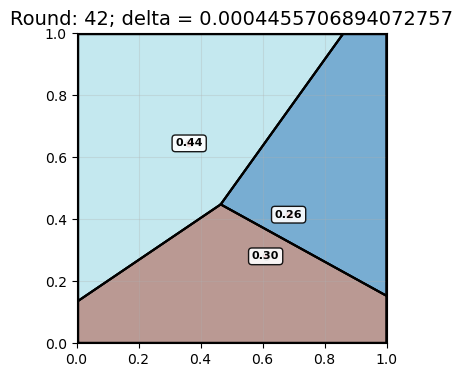

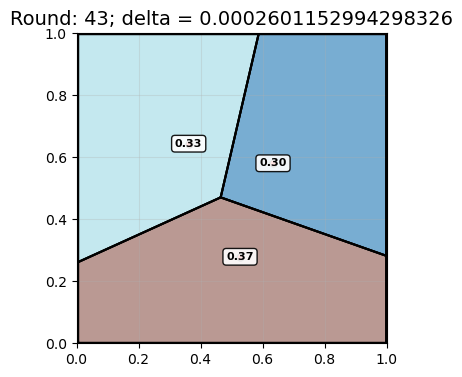

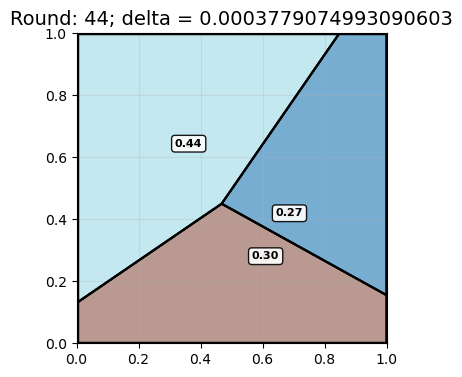

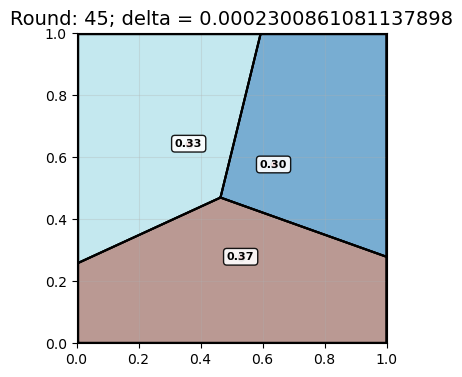

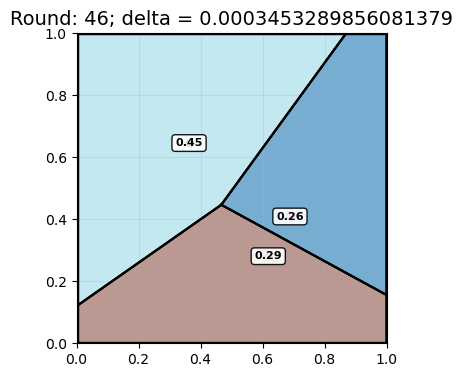

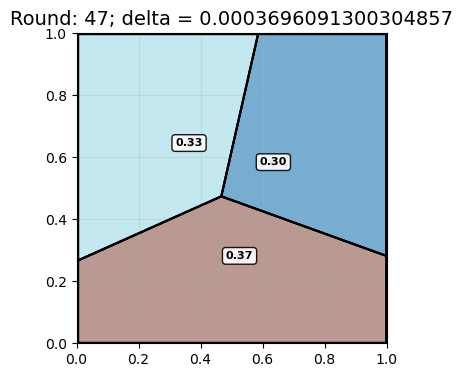

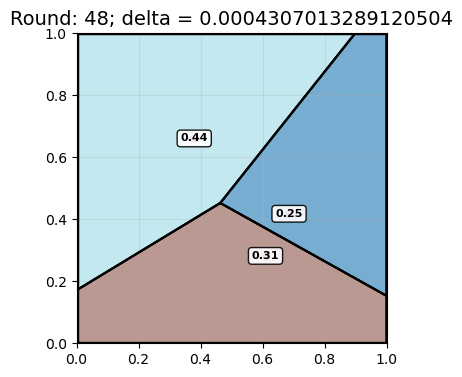

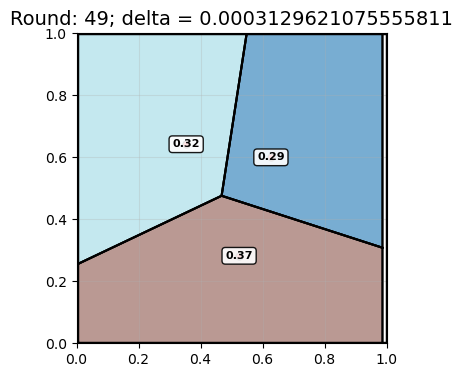

In [100]:
rounds = 50
for round_ in range(rounds):
    delta = 0
    for i in range(n):
        points, start_area, end_area = Adam(a,b, points, i, supress = True)
        delta += (end_area - start_area)**2
        segments, areas = make_voronoi(a,b,points)
    draw(a,b, points, segments, areas, figsize = (4,6), show_area_index = -1, header = f"Round: {round_}; delta = {delta}")